### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize']=[20,10]
plt.rcParams['figure.dpi']=100
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [3]:
df=pd.read_csv('vehicle.csv').dropna()
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

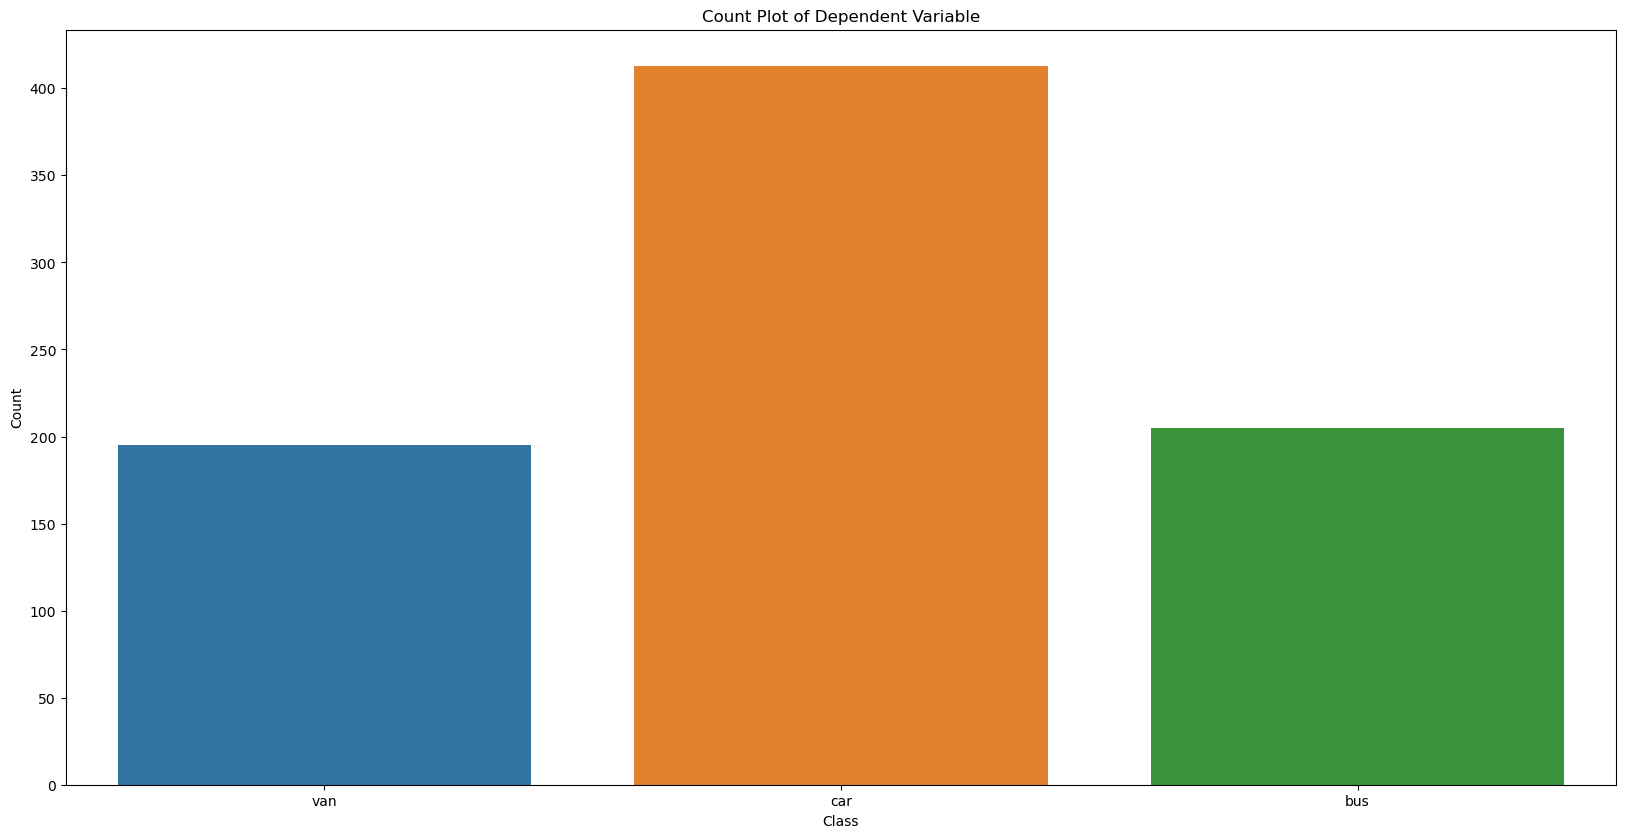

In [4]:
sns.countplot(x='class',data=df)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count Plot of Dependent Variable")
plt.show()

### 3. Check for any missing values in the data 

In [5]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 4. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [6]:
from scipy.stats import zscore
df_scaled = df.drop('class',1).apply(zscore)
df_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 5. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [13]:
distortion = []

### 6. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

**Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.**

In [14]:
X=df.iloc[:,:-1]
for n in range (1,10):
    kmeans=KMeans(n_clusters=n,n_init=10)
    kmeans.fit(X)
    distortion.append(kmeans.inertia_)
df2=pd.DataFrame({"Num_cluster":range(1,10),"Cluster_errors":distortion})
print(df2)

   Num_cluster  Cluster_errors
0            1    2.917617e+07
1            2    6.905477e+06
2            3    4.610991e+06
3            4    3.333244e+06
4            5    2.288297e+06
5            6    1.823916e+06
6            7    1.601418e+06
7            8    1.450536e+06
8            9    1.355987e+06


### 7. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

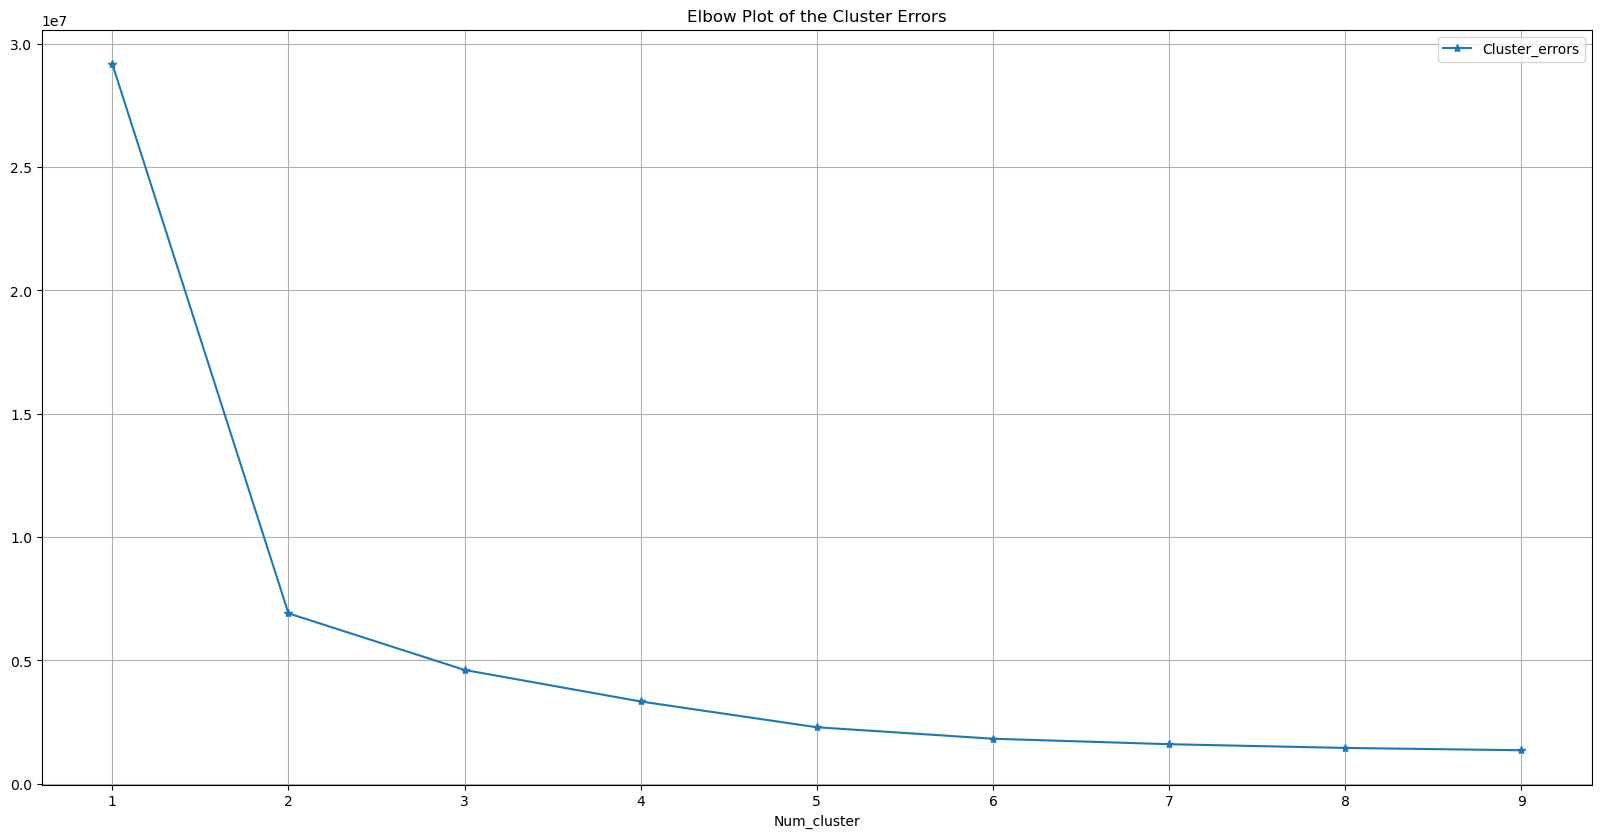

In [19]:
df2.plot(kind="line",x='Num_cluster',y='Cluster_errors',figsize=(20,10),title="Elbow Plot of the Cluster Errors",grid=True,marker="*")

### 8. Find out the optimal value of K

In [20]:
kmeans=KMeans(n_clusters=3,n_init=10)
kmeans.fit_predict(X)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0,

### 9. Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [21]:
kmeans.cluster_centers_

array([[ 88.32403433,  41.20600858,  71.18240343, 146.61587983,
         60.46566524,   7.96351931, 144.26824034,  46.75751073,
         18.70171674, 140.2639485 , 166.01072961, 310.31330472,
        157.11802575,  73.39914163,   6.07939914,  10.91201717,
        187.91630901, 193.98283262],
       [104.15920398,  53.0199005 , 102.81094527, 202.02985075,
         62.10447761,   9.82089552, 217.23383085,  30.70646766,
         24.40298507, 166.37313433, 230.07462687, 700.87064677,
        213.72636816,  72.45771144,   7.30845771,  15.90547264,
        188.        , 196.43283582],
       [ 96.21917808,  44.97260274,  88.11643836, 195.52054795,
         65.5       ,   8.94520548, 179.10273973,  36.73287671,
         21.19178082, 146.79452055, 202.3630137 , 485.78082192,
        174.59589041,  69.13013699,   5.90410959,  13.92465753,
        193.71917808, 200.33561644]])

### 10. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [22]:
pd.DataFrame({'Centroids Bus':kmeans.cluster_centers_[0],'Centroids Car':kmeans.cluster_centers_[1],'Centroids Van':kmeans.cluster_centers_[2]})

,Centroids Bus,Centroids Car,Centroids Van
0,88.324034,104.159204,96.219178
1,41.206009,53.019900,44.972603
2,71.182403,102.810945,88.116438
3,146.615880,202.029851,195.520548
4,60.465665,62.104478,65.500000
5,7.963519,9.820896,8.945205
6,144.268240,217.233831,179.102740
7,46.757511,30.706468,36.732877
8,18.701717,24.402985,21.191781
9,140.263948,166.373134,146.794521


### 11. Use kmeans.labels_ function to print out the labels of the classes

In [23]:
df_labels=pd.DataFrame({"Labels_kmeans":kmeans.labels_})
df_labels['Labels_kmeans'] = df_labels['Labels_kmeans'].astype('category')
df_labels.head()

,Labels_kmeans
0,0
1,0
2,1
3,0
4,0


### 12. Use kmeans.labels_ function to print out the labels of the classes

In [24]:
df_labels=pd.DataFrame({"Labels_kmeans":kmeans.labels_})
df_labels['Labels_kmeans'] = df_labels['Labels_kmeans'].astype('category')
df_labels.head()

,Labels_kmeans
0,0
1,0
2,1
3,0
4,0
